In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

sns.set()

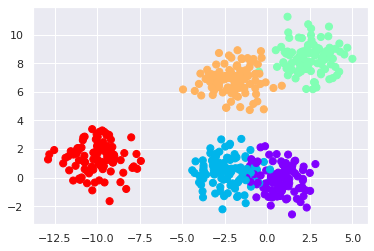

In [24]:
x, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')

In [25]:
tree = DecisionTreeClassifier().fit(x, y)

In [7]:
def visualize_tree(model, x, y, ax=None, cmap='rainbow'):
  ax = ax or plt.gca()
  ax.scatter(x[:, 0], x[:, 1], c=y, s=20, cmap=cmap)
  ax.axis('tight')
  ax.axis('off')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  model.fit(x, y)

  x2, y2 = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))

  z = model.predict(np.c_[x2.ravel(), y2.ravel()]).reshape(x2.shape)

  n_classes=len(np.unique(y))
  contours = ax.contourf(x2, y2, z, alpha=0.2, levels=np.arange(n_classes + 1)-0.5, cmap=cmap, clim=(y.min(), y.min()), zorder=1)

  ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'clim'
  app.launch_new_instance()


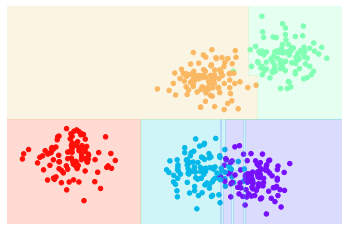

In [26]:
visualize_tree(DecisionTreeClassifier(), x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'clim'
  app.launch_new_instance()


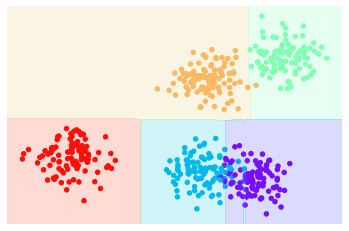

In [27]:
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(x, y)
visualize_tree(bag, x, y)

In [29]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target)
model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=0.8).fit(xtrain, ytrain)
predict = model.predict(xtest)
print(metrics.classification_report(predict, ytest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.91      0.95      0.93        55
           2       0.98      0.91      0.94        44
           3       0.86      0.90      0.88        41
           4       1.00      1.00      1.00        36
           5       0.97      0.95      0.96        37
           6       1.00      0.97      0.99        38
           7       1.00      0.89      0.94        54
           8       0.87      0.94      0.90        50
           9       0.84      0.91      0.87        45

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



Text(89.18, 0.5, 'predicted')

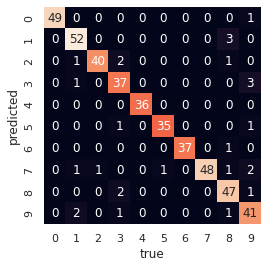

In [33]:
mat = confusion_matrix(ytest, predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true')
plt.ylabel('predicted')